**Práctica 6: Modelos lineales con scipy.stats**

Modelos lineales son para representar una variable de interés como una función de uno o más factores conocidos de tal forma que se maximice la proporción de variación explicada por el modelo. 

Ya que la mayor cantidad de información disponible en el estudio de caso ejemplo son de alumnos de Elisa de primera oportunidad y esa distribución parece bimodal, antes de intentar construir semejantes modelos, habrá que intentar a separar las dos poblaciones que causan el comportamiento bimodal. Además convendrá repetir las pruebas estadísticas y algunas de las visualizaciones de las prácticas anteriores para la población hipotética A de "alumnos que sí se esfuerzan" una vez que han sido separadas de la segunda población hipotética B de "alumnos que no le echan nada de ganas".

Como un primer intento, asignemos todos los alumnos que no tenían derecho a segunda oportunidad en la población B y vemos cómo queda la distribución de calificaciones de primera oportunidad entre los alumnos restantes, ahora trabajando solamente con alumnos de Elisa ya que sabemos que provienen de otra distribución las calificaciones de Moisés (por ser otra unidad de aprendizaje, otro maestro y diferentes programas educativos).

Ya que se han hecho agregaciones y limpiezas a los datos en prácticas anteriores, mejor primero crear un archivo nuevo CSV con la versión mejorada. 

In [ ]:
import pandas as pd
from numpy import NaN

d = pd.read_csv("graficar.csv")
d['aIng'] = [NaN if v == 'nan' else '20' + v if int(v) < 20 else '19' + v for v in [str(v) for v in tmp]]
d['sIng'] = [NaN if v == 'nan' else v[:2] for v in [str(v) for v in d.ingreso]]
d['saIng'] = [NaN if x is NaN else int(x) + (0.1 if y == "AD" else 0.2) for x, y in zip(d.aIng, d.sIng)]
d.hrsEstudio_ini = d.hrsEstudio_ini.replace("Menos de una hora", "< 1 h")
d.hrsEstudio_ini = d.hrsEstudio_ini.replace("Entre 1 y 2 horas", "1-2 h")
d.hrsEstudio_ini = d.hrsEstudio_ini.replace("Entre 2 y 3 horas", "2-3 h")
d.hrsEstudio_ini = d.hrsEstudio_ini.replace("Entre 3 y 5 horas", "3-5 h")
d.hrsEstudio_ini = d.hrsEstudio_ini.replace("Más de 5 horas", "> 5 h")
d.hrsEstudio_mcu = d.hrsEstudio_mcu.replace("Una hora o menos", "< 1 h")
d.hrsEstudio_mcu = d.hrsEstudio_mcu.replace("Menos de una hora", "< 1 h")
d.hrsEstudio_mcu = d.hrsEstudio_mcu.replace("Entre una y dos horas", "1-2 h")
d.hrsEstudio_mcu = d.hrsEstudio_mcu.replace("Entre dos y tres horas", "2-3 h")
d.hrsEstudio_mcu = d.hrsEstudio_mcu.replace("Entre tres y cinco horas", "3-5 h")
d.hrsEstudio_mcu = d.hrsEstudio_mcu.replace("Más de cinco horas", "> 5 h")
d.hrsEstudio = d.hrsEstudio.replace("Menos de una hora", "< 1 h")
d.hrsEstudio = d.hrsEstudio.replace("Entre una y dos horas", "1-2 h")
d.hrsEstudio = d.hrsEstudio.replace("Entre dos y tres horas", "2-3 h")
d.hrsEstudio = d.hrsEstudio.replace("Entre tres y cinco horas", "3-5 h")
d.hrsEstudio = d.hrsEstudio.replace("Más de cinco horas", "> 5 h")
d.to_csv("modelar.csv")

Poniendo el archivo resultante en el servidor web, podemos nuevamente escribir códigos que se ejecutarán en jupyter sin bronca.

Luego filtramos que 
* sean puros alumnos de Elisa
* tengan calificación aprobatoria en primera oportunidad o calificación numérica en segunda oportunidad
y checamos si ahora tenemos algo que se comporte de manera normalmente distribuida.

579
466
203
62
265
0.977020263671875 0.0002801140653900802 0.05 no normal
0.977020263671875 0.0002801140653900802 0.01 no normal


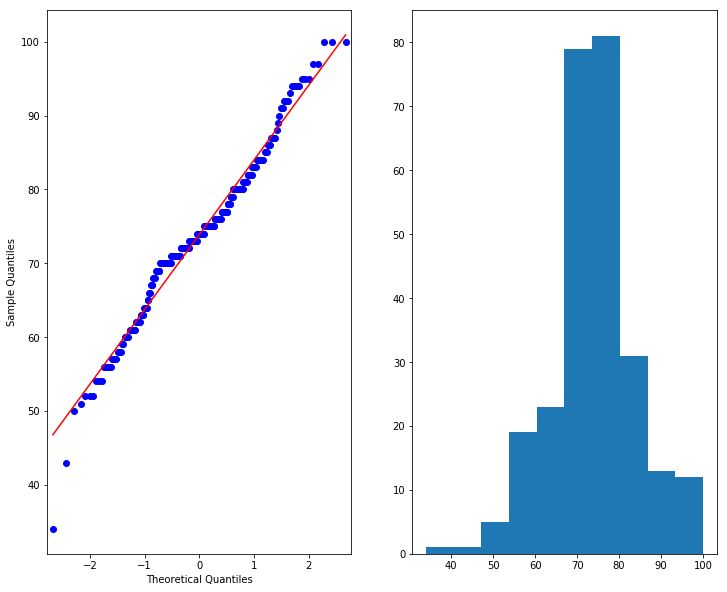

In [83]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
print(len(d))
e = d.loc[d.profe == 'elisa'] # filtramos los de elisa  
print(len(e))
d1 = e.loc[e.CF1op >= 70]
print(len(d1))
d2 = e.loc[~isnan(e.CF2op)]
print(len(d2))
m = pd.concat([d1, d2])
print(len(m))
d = m.CF1op.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

Las figuras (producidas al ejecutar el bloque de código anterior) muestran que hemos mejorado la normalidad con esta primera versión de población A, pero aún hay ruido: la cola izquierda está más larga que la derecha. 
Los alumnos que sí tienen *derecho* a segunda oportunidad, pero la aprovechan, aparecen como NP en segunda, por lo cual no pueden ser la causa porque ya han sido eliminados de la población A. 

Una explicación potencial aquí es que 100 es un corte que se ha impuesto a las calificaciones: población A probablemente contiene alumnos que sacarían más de cien, es decir, participando en actividades puntos extra aún cuando su calificación ya es muy alta. 

Vamos a ver qué les pasa a las demás pruebas estadísticas de la práctica 5 y a las correlaciones que se calcularon en la práctica 3 si nos limitamos a esta población A. 

In [17]:
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

print("estimado inicial: antes", o.CF1op.corr(o.eI), "después", m.CF1op.corr(m.eI))
print("estimado a la mitad: antes", o.CF1op.corr(o.eM), "después", m.CF1op.corr(m.eM))
print("estimado final: antes", o.CF1op.corr(o.eF), "después", m.CF1op.corr(m.eF))

estimado inicial: antes 0.195781365919 después 0.279413247137
estimado a la mitad: antes 0.488145928468 después 0.527665833038
estimado final: antes 0.462213304941 después 0.468392736584


Todas subieron. ¿Y las demás pruebas de la práctica 5? Vamos a ver si hay diferencia entre los tres grupos de Elisa:
* M4-6 en el salón 4208
* V1-3 en el salón 4204
* V4-6 en el salón 4200

In [20]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu, wilcoxon,  kruskal
import ssl

def prueba(d1, d2, a = 0.05, k = 20):
    if min(len(d1), len(d2)) < k:
        return None # no se puede concluir nada con tan pocos datos                                                                                                                               
    else:
        return mannwhitneyu(d1, d2)[1] > a # True si es la misma distribución                                                                                                                     

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

grupos = [g[1].CF1op.dropna() for g in m.groupby(['grupo'])]
print(' '.join([str(len(g)) for g in grupos]))
print(prueba(grupos[0], grupos[1]))
print(prueba(grupos[0], grupos[2]))
print(prueba(grupos[1], grupos[2]))

pares = dict()
x = m.loc[~isnan(m.CF1op) & ~isnan(m.CF2op)]
pares['segundas'] = (x.CF1op, x.CF2op)
x = m.loc[~isnan(m.eI) & ~isnan(m.eM)]
pares['ini_vs_mcu'] = (x.eI, x.eM)
x = m.loc[~isnan(m.eM) & ~isnan(m.eF)]
pares['mcu_vs_ord'] = (x.eM, x.eF)
x = m.loc[~isnan(m.eI) & ~isnan(m.eF)]
pares['ini_vs_ord'] = (x.eI, x.eF)
a = 0.05 # hemos reducido los datos, mejor quedarnos con alpha de cinco porciento                                                                                                                 
for d in pares:
    (d1, d2) = pares[d]
    print('datos insuficientes' if min(len(d1), len(d2)) < 20 else \
          "iguales" if wilcoxon(d1, d2)[1] > a else "diferentes", "para", d)
    
niv = {'sem de ingreso': [g[1].CF1op.dropna() for g in m.groupby(['inicio'])], \
       'hrs de trabajo':  [g[1].CF1op.dropna() for g in m.groupby(['hrsNum'])], \
       'sabe cr':  [g[1].CF1op.dropna() for g in m.groupby(['sabeCreditos'])], \
       'sabe hrs': [g[1].CF1op.dropna() for g in m.groupby(['sabeHoras'])], \
       'sabe ambos': [g[1].CF1op.dropna() for g in m.groupby(['sabeAmbos'])], \
       'sabe prom': [g[1].CF1op.dropna() for g in m.groupby(['sabePromedio'])], \
       'fue a asesorias': [g[1].CF1op.dropna() for g in m.groupby(['fueAses'])], \
       'estudio ini': [g[1].CF1op.dropna() for g in m.groupby(['hrsEstudio_ini'])], \
       'estudio mcu': [g[1].CF1op.dropna() for g in m.groupby(['hrsEstudio_mcu'])], \
       'estudio ord': [g[1].CF1op.dropna() for g in m.groupby(['hrsEstudio'])]}
print('\n'.join([("insufientes datos" if min([len(x) for x in niv[d]]) < 5 else \
                  "sin diferencia" if kruskal(*niv[d])[1] > a else "hay diferencia") +  \
                 " para " +  d for d in niv]))

69 68 75
True
True
True
diferentes para segundas
diferentes para ini_vs_mcu
iguales para mcu_vs_ord
diferentes para ini_vs_orc
hay diferencia para sem de ingreso
hay diferencia para hrs de trabajo
sin diferencia para sabe cr
sin diferencia para sabe hrs
sin diferencia para sabe ambos
sin diferencia para sabe prom
sin diferencia para fue a asesorias
hay diferencia para estudio ini
sin diferencia para estudio mcu
insufientes datos para estudio ord


No hay diferencia estadísticamente significativa entre los tres combos hora-salón, calificaciones siguen cambiando entre 1ra y 2da para la población A, la califación espera sigue estancando entre la segunda y la tercera encuesta.

Ahora, en la población A, el semestre de ingreso *sí* afecta, igual como las horas trabajadas.

El sí o no saben definiciones de créditos no tiene efecto, igual como las asesorías.

El plan inicial de cuánto van a estudiar sí tiene efecto, mientras las horas de estudio reportadas a mitad del semestre no. Vamos a examinar lo de la última encuesta para lograr un resultado ahí, combinando aquel factor que tiene menos de cinco respuestas con la más cercana:

In [22]:
import pandas as pd
from scipy.stats import kruskal
import ssl

def prueba(d1, d2, a = 0.05, k = 20):
    if min(len(d1), len(d2)) < k:
        return None # no se puede concluir nada con tan pocos datos                                                                                                                               
    else:
        return mannwhitneyu(d1, d2)[1] > a # True si es la misma distribución                                                                                                                     

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])
print(m.hrsEstudio.value_counts())
m.hrsEstudio = m.hrsEstudio.replace("< 1 h", "< 2 h")
m.hrsEstudio = m.hrsEstudio.replace("1-2 h", "< 2 h")
print(m.hrsEstudio.value_counts())
n = [g[1].CF1op.dropna() for g in m.groupby(['hrsEstudio'])]
print("insuf" if min([len(x) for x in n]) < 5 else "sin dif" if kruskal(*n)[1] > a else "hay dif")

1-2 h    101
2-3 h     39
3-5 h     39
> 5 h     16
Nada       7
< 1 h      4
Name: hrsEstudio, dtype: int64
< 2 h    105
2-3 h     39
3-5 h     39
> 5 h     16
Nada       7
Name: hrsEstudio, dtype: int64
sin dif


Pues, no afecta. Pues, tomemos ahora los que sí afectan y empezamos con lo de modelos lineales para determinar cómo afecta. 

Intentemos primero modelar la calificación de 2da op como una función de la calificación de 1ra op con __[regresión lineal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)__:

y = f(x) = 0.6939 x + 29.1425
error 0.0767632474655
valor p 8.48457917635e-13
pendiente significativo
R^2 0.576584209713


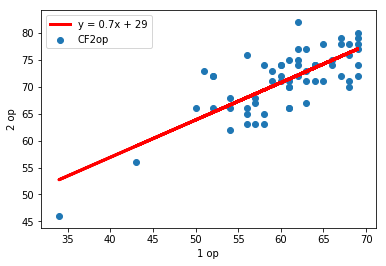

In [39]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

y = m.CF2op # lo que se modela
x = m.CF1op # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("1 op")
plt.ylabel("2 op")
plt.show()

Entonces, la calificación de 2da op en mates discretas con Elisa se puede estimar como 0.7 veces la de 1ra más 29, aproximadamente.

Vamos a ver la relación de horas de trabajo con la calificación de primera oportunidad con esta misma metodología.

y = f(x) = -0.1013 x + 76.9600
error 0.0396235349594
valor p 0.0116398480166
pendiente significativo
R^2 0.0439842349679


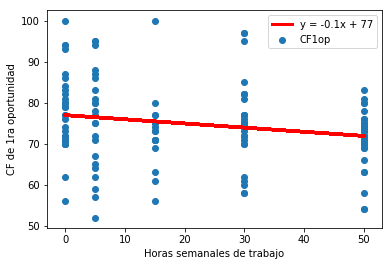

In [41]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

y = m.CF1op # lo que se modela
x = m.hrsNum # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper right')
plt.xlabel("Horas semanales de trabajo")
plt.ylabel("CF de 1ra oportunidad")
plt.show()

El error es mucho mayor, en gran parte debido a la discretización del eje horizontal por cómo era formulada la pregunta en la encuesta: la calificación de primera parece bajar en función de las horas de trabajo. Vamos a calcular, según este modelo, cuántos puntos se pierde por cada 10 horas de trabajo semanal.

In [45]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

y = m.CF1op # lo que se modela
x = m.hrsNum # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
for hrs in range(0, 81, 10): # de cero a 80 hrs por semana en brincos de 10 hrs
    print("trabajando {:d} hrs, sacas un {:.0f}".format(hrs, a * hrs + b))

trabajando 0 hrs, sacas un 77
trabajando 10 hrs, sacas un 76
trabajando 20 hrs, sacas un 75
trabajando 30 hrs, sacas un 74
trabajando 40 hrs, sacas un 73
trabajando 50 hrs, sacas un 72
trabajando 60 hrs, sacas un 71
trabajando 70 hrs, sacas un 70
trabajando 80 hrs, sacas un 69


Pues, el efecto pinta muy leve. Trabajando dos chambas de tiempo completo, uno terminaría reprobando, que no suena nada sorprendente. 

¿Qué tal el efecto del semestre de ingreso?

y = f(x) = 6.5985 x + 69.5165
error 1.25072582257
valor p 2.76571990273e-07
pendiente significativo
R^2 0.0957011275516


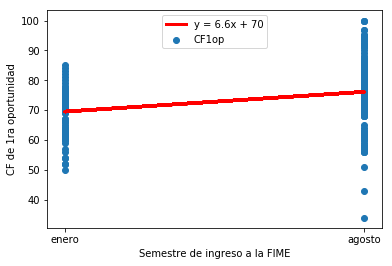

Si entraste en enero, sacas 70
Si entraste en agosto, sacas 76


In [51]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

y = m.CF1op # lo que se modela
x = m.inicio # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
x = x.replace("enero", 0) # ocupan ser números
x = x.replace("agosto", 1)
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper center')
plt.xlabel("Semestre de ingreso a la FIME")
plt.xticks([0, 1], ["enero", "agosto"])
plt.ylabel("CF de 1ra oportunidad")
plt.show()

print("Si entraste en enero, sacas {:.0f}".format(b))
print("Si entraste en agosto, sacas {:.0f}".format(a + b))

El error es algo grande y se nota en la gráfica que hay datos anomales (se les dice outliers en inglés), pero sí pinta que hay un efecto ahí.

Se supone que el plan de horas de estudio también afectaba. Hay que asignarle una escala numérica a las categorias antes de modelarlo.

['3-5 h' '2-3 h' '> 5 h' '1-2 h' nan '< 1 h']
y = f(x) = -0.5522 x + 75.5285
error 0.412061914601
valor p 0.181553176834
pendiente no significativo
R^2 0.00781483040268


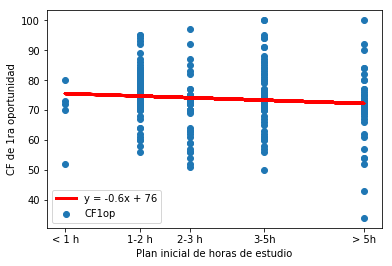

In [57]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

y = m.CF1op # lo que se modela
x = m.hrsEstudio_ini # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
print(m.hrsEstudio_ini.unique())
x = x.replace(['3-5 h', '2-3 h', '> 5 h', '1-2 h', '< 1 h'],\
             [4, 2.5, 6, 1.5, 0]) # obvio que esto afecta en cómo queda, intentemos con algo
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)
plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='lower left')
plt.xlabel("Plan inicial de horas de estudio")
plt.xticks([0, 1.5, 2.5, 4, 6], ["< 1 h", "1-2 h", "2-3 h", "3-5h", "> 5h"])
plt.ylabel("CF de 1ra oportunidad")
plt.show()

Es mucho el error, el pendiente *no* difiere significativamente de cero y se nota en la gráfica que el último grupo va bajando. Vamos a reagrupar, combinando los < 1 h con los 1-2 horas. Quitemos además los que dicen que estudiarán más de cinco horas semanales fuera de clase para una sola unidad de aprendizaje (todos sabemos que es una alucionación más que un plan de acción viable y realista).

['3-5 h' '2-3 h' '> 5 h' '1-2 h' nan '< 1 h']
y = f(x) = -0.1453 x + 74.7099
error 0.529075306897
valor p 0.783898250347
pendiente no significativo
R^2 0.000398905514951


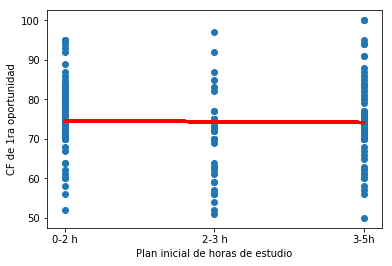

In [62]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan, NaN
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

y = m.CF1op # lo que se modela
x = m.hrsEstudio_ini # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
print(m.hrsEstudio_ini.unique())
x = x.replace(['3-5 h', '2-3 h', '> 5 h', '1-2 h', '< 1 h'],\
             [4, 2.5, NaN, 1, 1]) # segundo intento
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)
plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.xlabel("Plan inicial de horas de estudio")
plt.xticks([1, 2.5, 4], ["0-2 h", "2-3 h", "3-5h"])
plt.ylabel("CF de 1ra oportunidad")
plt.show()

Nope, nada útil. Otro intento: ponemos en un grupo los que dicen que estudian menos de una hora con los que alucinan sobre más de cinco horas y en otro grupo los planes realistas de estudio.

['3-5 h' '2-3 h' '> 5 h' '1-2 h' nan '< 1 h']
y = f(x) = 3.8421 x + 70.6364
error 1.72170422655
valor p 0.0266152687141
pendiente significativo
R^2 0.0213751241845


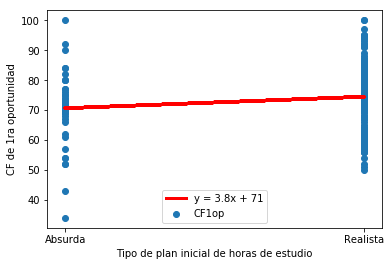

Si tu plan de estudiar tiene sentido, sacas 74
Si tu plan no convence, sacas 71


In [66]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
m = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])

y = m.CF1op # lo que se modela
x = m.hrsEstudio_ini # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
print(m.hrsEstudio_ini.unique())
x = x.replace(['3-5 h', '2-3 h', '> 5 h', '1-2 h', '< 1 h'], [1, 1, 0, 1, 0]) # último intento
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)
plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='lower center')
plt.xlabel("Tipo de plan inicial de horas de estudio")
plt.xticks([0, 1], ["Absurda", "Realista"])
plt.ylabel("CF de 1ra oportunidad")
plt.show()
print("Si tu plan de estudiar tiene sentido, sacas {:.0f}".format(a + b))
print("Si tu plan no convence, sacas {:.0f}".format(b))

Hey. Ya obtuve un pendiente significativo. Aún así, la diferencia es poca y el error es grande.

Vamos a ver cómo son estos modelos para los alumnos de Moisés que se esforzaron (el mismo tipo de filtro):

579
113
73
8
81
no normal
estimado inicial: antes 0.195781365919 después 0.287209365884
estimado a la mitad: antes 0.488145928468 después 0.538297253146
estimado final: antes 0.462213304941 después 0.182485232562
datos insuficientes para segundas
datos insuficientes para ini_vs_mcu
datos insuficientes para mcu_vs_ord
datos insuficientes para ini_vs_ord
sin diferencia para sem de ingreso
insufientes datos para hrs de trabajo
insufientes datos para sabe cr
insufientes datos para sabe hrs
insufientes datos para sabe ambos
hay diferencia para sabe prom
sin diferencia para fue a asesorias
sin diferencia para estudio ini
insufientes datos para estudio mcu
insufientes datos para estudio ord
['3-5 h' '2-3 h' '1-2 h' nan '> 5 h']
y = f(x) = 1.0006 x + 79.2065
error 1.27430436032
valor p 0.440709150592
pendiente no significativo
R^2 0.0272607381121
si planeas estudiar > 5 h, sacas un 86
si planeas estudiar 3-5 h, sacas un 83
si planeas estudiar 2-3 h, sacas un 81
si planeas estudiar 1-2 h, sacas

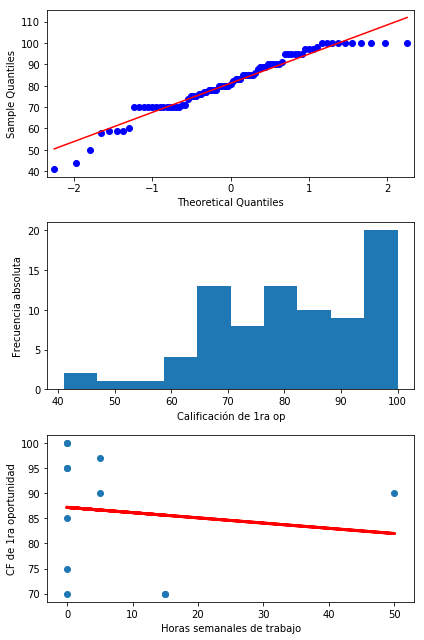

In [107]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
print(len(d))
moi = d.loc[d.profe == 'moi'] # filtramos los de moi ahora  
print(len(moi))
d1 = moi.loc[moi.CF1op >= 70]
print(len(d1))
d2 = moi.loc[~isnan(moi.CF2op)]
print(len(d2))
m = pd.concat([d1, d2])
print(len(m))
d = m.CF1op.dropna()
plt.rcParams["figure.figsize"] = [6, 9]
f = plt.figure()  
qqplot(d, line='s', ax = f.add_subplot(311))
sf = f.add_subplot(312)
sf.hist(d)
sf.set_xlabel("Calificación de 1ra op")
sf.set_ylabel("Frecuencia absoluta")
a = 0.05
print("normal" if shapiro(d)[1] > a else "no normal")
print("estimado inicial: antes", o.CF1op.corr(o.eI), "después", m.CF1op.corr(m.eI))
print("estimado a la mitad: antes", o.CF1op.corr(o.eM), "después", m.CF1op.corr(m.eM))
print("estimado final: antes", o.CF1op.corr(o.eF), "después", m.CF1op.corr(m.eF))
pares = dict()
x = m.loc[~isnan(m.CF1op) & ~isnan(m.CF2op)]
pares['segundas'] = (x.CF1op, x.CF2op)
x = m.loc[~isnan(m.eI) & ~isnan(m.eM)]
pares['ini_vs_mcu'] = (x.eI, x.eM)
x = m.loc[~isnan(m.eM) & ~isnan(m.eF)]
pares['mcu_vs_ord'] = (x.eM, x.eF)
x = m.loc[~isnan(m.eI) & ~isnan(m.eF)]
pares['ini_vs_ord'] = (x.eI, x.eF)                                                                                                            
for d in pares:
    (d1, d2) = pares[d]
    print('datos insuficientes' if min(len(d1), len(d2)) < 20 else \
          "iguales" if wilcoxon(d1, d2)[1] > a else "diferentes", "para", d)
niv = {'sem de ingreso': [g[1].CF1op.dropna() for g in m.groupby(['inicio'])], \
       'hrs de trabajo':  [g[1].CF1op.dropna() for g in m.groupby(['hrsNum'])], \
       'sabe cr':  [g[1].CF1op.dropna() for g in m.groupby(['sabeCreditos'])], \
       'sabe hrs': [g[1].CF1op.dropna() for g in m.groupby(['sabeHoras'])], \
       'sabe ambos': [g[1].CF1op.dropna() for g in m.groupby(['sabeAmbos'])], \
       'sabe prom': [g[1].CF1op.dropna() for g in m.groupby(['sabePromedio'])], \
       'fue a asesorias': [g[1].CF1op.dropna() for g in m.groupby(['fueAses'])], \
       'estudio ini': [g[1].CF1op.dropna() for g in m.groupby(['hrsEstudio_ini'])], \
       'estudio mcu': [g[1].CF1op.dropna() for g in m.groupby(['hrsEstudio_mcu'])], \
       'estudio ord': [g[1].CF1op.dropna() for g in m.groupby(['hrsEstudio'])]}
print('\n'.join([("insufientes datos" if min([len(x) for x in niv[d]]) < 5 else \
                  "sin diferencia" if kruskal(*niv[d])[1] > a else "hay diferencia") +  \
                 " para " +  d for d in niv]))
y = m.CF1op # lo que se modela
x = m.hrsEstudio_ini # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
print(m.hrsEstudio_ini.unique())
x = x.replace(['3-5 h', '2-3 h', '1-2 h','> 5 h'], [4, 1.5, 0.5, 7]) 
mascara = ~isnan(x) & ~isnan(y)
a, b, r, p, e = stats.linregress(x[mascara], y[mascara])
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)
for (descr, valor) in zip(['> 5 h', '3-5 h', '2-3 h', '1-2 h',], [7, 4, 1.5, 0.5]):
    print("si planeas estudiar {:s}, sacas un {:.0f}".format(descr, a * valor + b))

x = m.hrsNum # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
mascara = ~isnan(x) & ~isnan(y)
a, b, r, p, e = stats.linregress(x[mascara], y[mascara])
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)
sf = f.add_subplot(313)
sf.plot(x[mascara], (a * x[mascara] + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
sf.scatter(x[mascara], y[mascara])
sf.set_xlabel("Horas semanales de trabajo")
sf.set_ylabel("CF de 1ra oportunidad")
for hrs in range(0, 81, 10): 
    print("trabajando {:d} hrs, sacas un {:.0f}".format(hrs, a * hrs + b))
    
x = m.inicio # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
x = x.replace("enero", 0) # ocupan ser números
x = x.replace("agosto", 1)
mascara = ~isnan(x) & ~isnan(y)
a, b, r, p, e = stats.linregress(x[mascara], y[mascara])
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)
print("Si entraste en enero, sacas {:.0f}".format(b))
print("Si entraste en agosto, sacas {:.0f}".format(a + b))

plt.tight_layout()
plt.show()


Para los alumnos de Moisés, los pendientes no son significativos y los modelos concluyen al revés: planear estudiar más resulta en mejores calificaciones y entrar en enero (son pocos) da mejores resultados. Los datos de 1ra op parecen aún menos normalmente distribuidos que antes. Es interesante ver que los alumnos de Moisés parecen tener mucho menos horas de trabajo a la semana...

MannwhitneyuResult(statistic=649.5, pvalue=0.00072803558272841178)


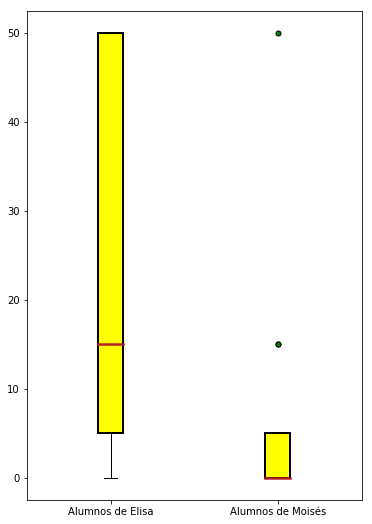

In [130]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
elisa = d.loc[d.profe == 'elisa'] 
moi = d.loc[d.profe == 'moi'] 
e = elisa.hrsNum.dropna()
m = moi.hrsNum.dropna()
print(mannwhitneyu(e, m))
# estilo visual modificado de https://matplotlib.org/gallery/statistics/boxplot.html
bp = dict(linestyle='-', linewidth = 2, color='black', facecolor='yellow')
fp = dict(marker = 'o', markerfacecolor = 'green', markersize = 5, linestyle = 'none')
mp = dict(linestyle = '-', linewidth = 2.5, color ='firebrick')
plt.boxplot([e, m], labels=["Alumnos de Elisa", "Alumnos de Moisés"], \
            boxprops = bp, flierprops = fp, medianprops = mp, patch_artist = True)
plt.show()


Esto sí es una diferencia significativa. 

En resumen, ningún modelo era muy bueno (un Rˆ2 de 0.85 o algo así ya convencería), pero hemos visto que para los alumnos de Elisa, la calificación en primera oportunidad sirve para pronosticar la de segunda oportunidad y que las horas de trabajo afectan los resultados, teniendo mucha diferencia entre los alumnos de materiales entre los cuales la mitad no trabaja nada y los de mates discretas, más de la mitad de los cuales trabajan por lo menos de tiempo parcial entre semestre.

En sus reportes de la sexta práctica, modelen por lo menos dos aspectos de sus datos con modelos lineales simples. Concluyan si los modelos obtenidos son significativos, grafiquen los resultados y saquen estimaciones (interpolaciones o extrapolaciones) con sus funciones f(x) obtenidas.